In [23]:
import pandas as pd
from os import listdir
from datetime import datetime


def read_comsumption_file(group_id):
    file_list = listdir("consumption_power")
    group_no_id_list = [f[:5] for f in file_list]
    consumption_power_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("consumption_power/"+consumption_power_name)

def read_meteo_data_file(group_id):
    file_list = listdir("meteo_data")
    group_no_id_list = [f[-9:-4] for f in file_list]
    meteo_data_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("meteo_data/"+meteo_data_name)


def read_date(datetime_str):
    return datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')


file_list = listdir("consumption_power")
groups_no_prod = pd.read_csv("groups_no_prod.csv")
group_id_0 = groups_no_prod

file_list = listdir("consumption_power")
group_no_id_list = [f[:5] for f in file_list] #remove the first last caracters to keep the group n0

In [2]:
groups_no_prod.group_id[0]


82015

In [7]:
group_id_no = str(groups_no_prod.group_id[10])
consumption_df = read_comsumption_file(group_id_no) 
meteo_df = read_meteo_data_file(group_id_no)

In [24]:
print(consumption_df.columns)
print(meteo_df.columns)

Index(['filter_mva', 'filter_mw', 'filtered_manual_int', 'gen', 'net_mw',
       'time_zone_offset', 'timestamp', 'underlying_mw', 'datetime',
       'underlying_mw_sum'],
      dtype='object')
Index(['prate', 'tcdcclm', 'timestamp', 'tmp2m', 'wnd10m_u', 'wnd10m_v',
       'group_id', 'datetime', 'prate_sum', 'tmp2m_sum'],
      dtype='object')


In [25]:
print(meteo_df.sort_values(by ="timestamp").head())
#point each hour

       prate  tcdcclm            timestamp       tmp2m  wnd10m_u  wnd10m_v  \
23963    0.0     63.0  2016-04-01 00:00:00  275.489000     -0.47      3.71   
23666    0.0     65.0  2016-04-01 01:00:00  276.360000     -0.40      4.57   
23993    0.0     76.0  2016-04-01 02:00:00  276.820016     -0.92      4.70   
24240    0.0     82.0  2016-04-01 03:00:00  277.195000     -0.82      4.77   
24334    0.0     86.0  2016-04-01 04:00:00  277.645016     -0.40      5.16   

       group_id            datetime  prate_sum     tmp2m_sum  
23963     82039 2016-04-01 00:00:00   0.012571  13527.176531  
23666     82039 2016-04-01 01:00:00   0.009991  13671.292438  
23993     82039 2016-04-01 02:00:00   0.012998  13467.545500  
24240     82039 2016-04-01 03:00:00   0.010668  13383.474469  
24334     82039 2016-04-01 04:00:00   0.009916  13387.314578  


In [26]:
print(consumption_df.sort_values(by ="timestamp").head())
#point each 1/2 hour

   filter_mva  filter_mw  filtered_manual_int  gen  net_mw  time_zone_offset  \
0         0.0        0.0                  1.0    0  19.087                 1   
1         0.0        0.0                  1.0    0  18.056                 1   
2         0.0        0.0                  1.0    0  16.439                 1   
3         0.0        0.0                  1.0    0  15.629                 1   
4         0.0        0.0                  1.0    0  15.420                 1   

             timestamp  underlying_mw            datetime  underlying_mw_sum  
0  2016-04-01 00:30:00         19.087 2016-04-01 00:30:00                NaN  
1  2016-04-01 01:00:00         18.056 2016-04-01 01:00:00                NaN  
2  2016-04-01 01:30:00         16.439 2016-04-01 01:30:00                NaN  
3  2016-04-01 02:00:00         15.629 2016-04-01 02:00:00                NaN  
4  2016-04-01 02:30:00         15.420 2016-04-01 02:30:00                NaN  


In [10]:
meteo_df["datetime"] = [read_date(date) for date in meteo_df.timestamp]
consumption_df["datetime"] = [read_date(date) for date in consumption_df.timestamp]
# meteo_df["date"] = [datetime.date for date in meteo_df.datetime]
# consumption_df["date"] = [datetime.date for date in consumption_df.datetime]

def change_scale(df,n,param):
    df[param] = meteo_df[param].rolling(n).sum()
    df[n::n][param].plot()



<AxesSubplot:title={'center':'prate/jour'}>

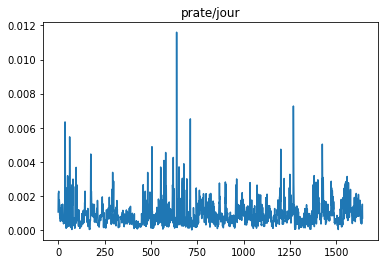

In [31]:
def change_scale(df,n,param):
    """plot the parameter data sum on a given time 
    ex : n=48 gives the sum for each day"""
    df[param+"_sum"] = df[param].rolling(n).sum()
    return df[n::n][param+"_sum"].reset_index()[param+"_sum"]

# scaled_df = change_scale(meteo_df,48*30,"wnd10m_u")
scaled_df = change_scale(meteo_df,24,"prate")

scaled_df[:].plot(title = "prate/jour")

# meteo_df.tmp2m[:365].plot()

<AxesSubplot:title={'center':'tmp2m/jour'}>

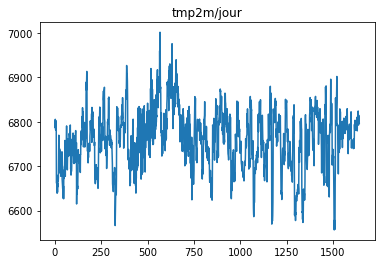

In [33]:
scaled_df = change_scale(meteo_df,24,"tmp2m")
scaled_df[:].plot(title = "tmp2m/jour")

<AxesSubplot:title={'center':'consommation/jour'}>

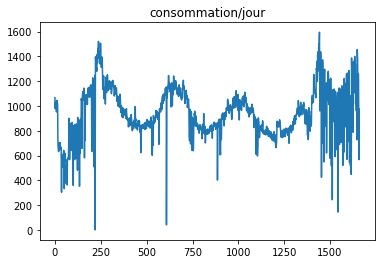

In [36]:
scaled_df = change_scale(consumption_df,48,"underlying_mw")
scaled_df[:].plot(title = "consommation/jour")
